# Sales Insights Unleashed : Revenue Trends with Data Analytics

### Project Overview: Adventure Works Sales Analysis
### Objective:
The primary objective of this project is to analyze the sales data of Adventure Works to identify trends, optimize inventory, and enhance sales strategies. By performing exploratory data analysis (EDA), we aim to uncover insights that can guide decision-making for improving business performance.

### AdventureWorks_Database.xlsx

This file contains multiple sheets, each representing different aspects of the data:

1. **Calender:**
   - Likely contains date-related information, such as fiscal periods, quarters, months, and years.

2. **Customers:**
   - Details about customers, possibly including customer IDs, names, contact information, and other demographic details.

3. **Product:**
   - Information about the products, including product IDs, names, categories, and other relevant attributes.

4. **Territory:**
   - Data about different sales territories, possibly including region names, territory IDs, and sales targets for each territory.

5. **Sales:**
   - Sales data, which could include transaction details such as sales amount, date, customer ID, product ID, and territory ID.

### Budget.xlsx

This file contains a single sheet:

1. **Budget:**
   - Likely includes budgeted sales figures, potentially broken down by time periods, product categories, territories, or other attributes.

### Next Steps

1. **Inspect and Explore Each Sheet:**
   - Load and inspect the first few rows of each sheet to understand the structure and contents.
   - Identify key columns and data types in each sheet.

2. **Integrate Data:**
   - Merge data from different sheets based on common keys (e.g., customer IDs, product IDs, territory IDs).

3. **Analyze and Compare:**
   - Compare actual sales data from the Sales sheet with budget data from the Budget sheet.
   - Conduct variance analysis to identify discrepancies between budgeted and actual sales.

4. **Create Dashboards:**
   - Use the integrated data to create visualizations and dashboards in Tableau or Power BI.



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the Excel files
adventureworks_data = pd.ExcelFile('AdventureWorks_Database.xlsx')
budget_data = pd.ExcelFile('Budget.xlsx')





In [4]:
# Parse each sheet into a DataFrame
calendar_df = adventureworks_data.parse('Calender')
customers_df = adventureworks_data.parse('Customers')
product_df = adventureworks_data.parse('Product')
territory_df = adventureworks_data.parse('Territory')
sales_df = adventureworks_data.parse('Sales')
budget_df = budget_data.parse('Budget')


In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1461 non-null   datetime64[ns]
 1   DateKey         1461 non-null   int64         
 2   Year            1461 non-null   int64         
 3   Quarter         1461 non-null   object        
 4   MonthNum        1461 non-null   int64         
 5   Month           1461 non-null   object        
 6   FiscalYear      1461 non-null   object        
 7   FiscalQuarter   1461 non-null   object        
 8   FiscalMonthNum  1461 non-null   int64         
 9   FiscalMonth     1461 non-null   object        
 10  MonthYear       1461 non-null   object        
 11  MonthYearLong   1461 non-null   object        
 12  MonthYearNum    1461 non-null   int64         
 13  WeekdayNum      1461 non-null   int64         
 14  Weekday         1461 non-null   object        
 15  Week

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   FirstName             18484 non-null  object        
 2   LastName              18484 non-null  object        
 3   FullName              18484 non-null  object        
 4   BirthDate             18484 non-null  datetime64[ns]
 5   MaritalStatus         18484 non-null  object        
 6   Gender                18484 non-null  object        
 7   YearlyIncome          18484 non-null  int64         
 8   TotalChildren         18484 non-null  int64         
 9   NumberChildrenAtHome  18484 non-null  int64         
 10  Education             18484 non-null  object        
 11  Occupation            18484 non-null  object        
 12  HouseOwnerFlag        18484 non-null  int64         
 13  NumberCarsOwned 

In [7]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ProductKey          606 non-null    int64         
 1   ProductName         606 non-null    object        
 2   SubCategory         397 non-null    object        
 3   Category            397 non-null    object        
 4   StandardCost        395 non-null    float64       
 5   Color               352 non-null    object        
 6   ListPrice           395 non-null    float64       
 7   DaysToManufacture   606 non-null    int64         
 8   ProductLine         380 non-null    object        
 9   ModelName           397 non-null    object        
 10  Photo               606 non-null    object        
 11  ProductDescription  396 non-null    object        
 12  StartDate           606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object

In [8]:
territory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  11 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Group              10 non-null     object
 4   RegionImage        11 non-null     object
dtypes: int64(1), object(4)
memory usage: 572.0+ bytes


In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [10]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AdventureWorks Budget Data  24 non-null     object
 1   Unnamed: 1                  18 non-null     object
 2   Unnamed: 2                  18 non-null     object
 3   Unnamed: 3                  18 non-null     object
 4   Unnamed: 4                  22 non-null     object
 5   Unnamed: 5                  22 non-null     object
 6   Unnamed: 6                  22 non-null     object
 7   Unnamed: 7                  22 non-null     object
 8   Unnamed: 8                  22 non-null     object
 9   Unnamed: 9                  22 non-null     object
 10  Unnamed: 10                 22 non-null     object
 11  Unnamed: 11                 22 non-null     object
 12  Unnamed: 12                 22 non-null     object
 13  Unnamed: 13                 22 non-null     object
 

# Data Cleaning

In [11]:
sales_customers_df = sales_df.merge(customers_df, on='CustomerKey', how='inner')
sales_customers_products_df = sales_customers_df.merge(product_df, on='ProductKey', how='inner')
sales_customers_products_territory_df = sales_customers_products_df.merge(territory_df, on='SalesTerritoryKey', how='inner')
sales_customers_products_territory_calendar_df = sales_customers_products_territory_df.merge(calendar_df, left_on='OrderDate', right_on='Date', how='inner')


In [12]:
sales_customers_products_territory_calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [13]:
# Rename the DataFrame
adventure_df = sales_customers_products_territory_calendar_df

# Display information about the renamed DataFrame
adventure_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [14]:
# Display initial column names
print("Initial Columns:")
print(adventure_df.columns.tolist())

# Drop the specific unnamed columns
columns_to_drop = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 22']
adventure_df_cleaned = adventure_df.drop(columns=columns_to_drop)

Initial Columns:
['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost_x', 'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price', 'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate', 'Region', 'Country', 'Group', 'RegionImage', 'Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear', 'FiscalQuarter', 'FiscalMonthNum', 'F

In [15]:
adventure_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 15     

In [16]:
adventure_df_cleaned.head(10)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday
5,311,2014-01-02,2014-01-09,27645,1,4,SO43702,1,4,894.5675,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,5,Thu,Weekday
6,310,2014-01-02,2014-01-09,16624,1,9,SO43703,1,4,894.5675,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,5,Thu,Weekday
7,351,2014-01-02,2014-01-09,11005,1,9,SO43704,1,4,843.7475,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,5,Thu,Weekday
8,344,2014-01-02,2014-01-09,11011,1,9,SO43705,1,4,849.9975,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,5,Thu,Weekday
9,312,2014-01-03,2014-01-10,27621,1,4,SO43706,1,1,3578.2700,...,FY2014,FQ3,7,Jan,Jan-14,Jan-2014,201401,6,Fri,Weekday


In [17]:
# Display specific unnamed columns
unnamed_columns = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']
print(adventure_df[unnamed_columns].head())

   Unnamed: 15  Unnamed: 16  Unnamed: 18
0    3578.2700          0.0    -764.3184
1    3399.9900          0.0    -424.3188
2    3399.9900          0.0    -424.3188
3     699.0982          0.0    -127.1944
4    3399.9900          0.0    -424.3188


In [18]:
# Identify unnamed columns
unnamed_columns = [col for col in adventure_df_cleaned.columns if 'Unnamed' in col]

# Inspect the unnamed columns
print("Unnamed Columns:", unnamed_columns)
print(adventure_df_cleaned[unnamed_columns].head())

Unnamed Columns: ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']
   Unnamed: 15  Unnamed: 16  Unnamed: 18
0    3578.2700          0.0    -764.3184
1    3399.9900          0.0    -424.3188
2    3399.9900          0.0    -424.3188
3     699.0982          0.0    -127.1944
4    3399.9900          0.0    -424.3188


In [19]:
# Identify unnamed columns
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']

# Drop the specified unnamed columns
adventure_df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Display column names after dropping the specified columns
print("Columns After Dropping Specified Unnamed Columns:")
print(adventure_df_cleaned.columns.tolist())

Columns After Dropping Specified Unnamed Columns:
['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'StandardCost_x', 'List Price', 'diif std cost', 'diff list price', 'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate', 'Region', 'Country', 'Group', 'RegionImage', 'Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear', 'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear', 'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday', 'We

In [20]:
adventure_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

In [21]:
adventure_df_cleaned.info

<bound method DataFrame.info of        ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0             310 2014-01-01 2014-01-08        21768             1   
1             346 2014-01-01 2014-01-08        28389             1   
2             346 2014-01-01 2014-01-08        25863             1   
3             336 2014-01-01 2014-01-08        14501             1   
4             346 2014-01-01 2014-01-08        11003             1   
...           ...        ...        ...          ...           ...   
58184         561 2016-12-30 2017-01-07        13650             1   
58185         584 2016-12-30 2017-01-07        26916             1   
58186         605 2016-12-30 2017-01-07        27473             1   
58187         538 2016-12-30 2017-01-07        27473             1   
58188         490 2016-12-30 2017-01-07        27473             1   

       SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  \
0                      6          SO43697                   

In [22]:
# Rename the DataFrame
adventure_data = adventure_df_cleaned



In [23]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

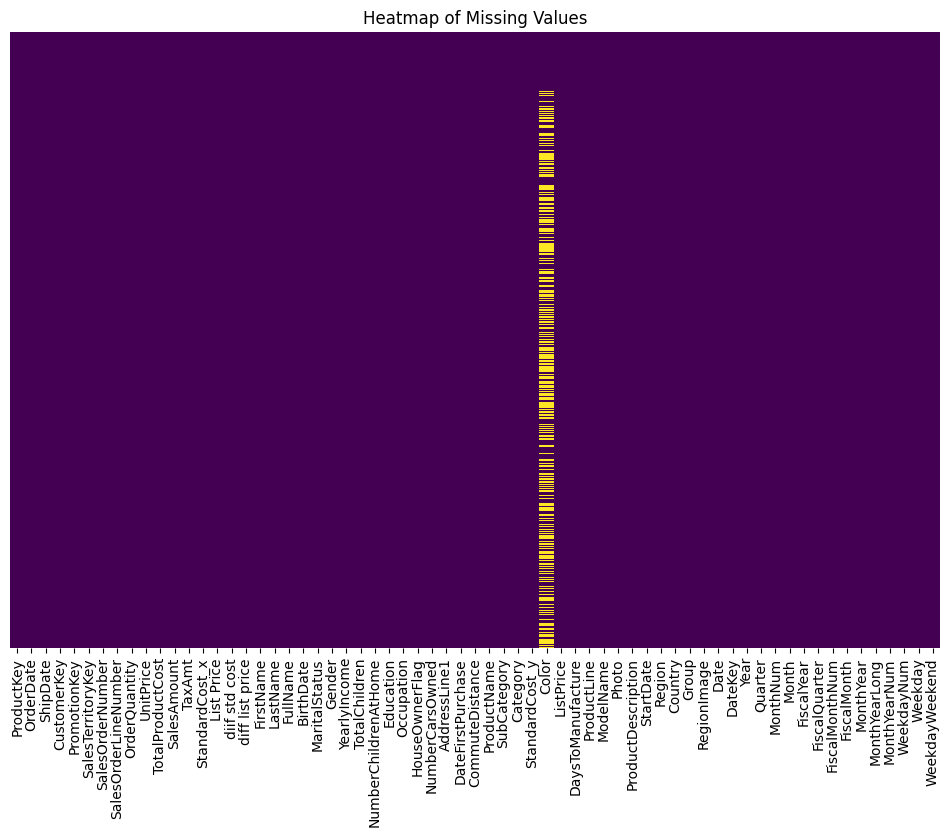

In [24]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(adventure_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### Interpretation:
The heatmap shows that most columns in the dataset have no missing values, indicated by the solid purple color. However, the `Color` column stands out with many missing values, represented by the yellow lines. This suggests that the `Color` column requires attention for data cleaning or imputation. Other columns appear to be complete and do not require further handling for missing data.

In [25]:
# Fill missing values in the 'Color' column with a placeholder (e.g., 'Unknown')
adventure_data['Color'] = adventure_data['Color'].fillna('Unknown')


# Verify the changes
print(adventure_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

### Inspect Current Data Types

In [26]:
# Display current data types
print("Current Data Types:")
print(adventure_data.dtypes)

Current Data Types:
ProductKey                 int64
OrderDate         datetime64[ns]
ShipDate          datetime64[ns]
CustomerKey                int64
PromotionKey               int64
                       ...      
MonthYearLong             object
MonthYearNum               int64
WeekdayNum                 int64
Weekday                   object
WeekdayWeekend            object
Length: 65, dtype: object


In [27]:
# Save the DataFrame to a CSV file in the same directory as the Jupyter Notebook
adventure_data.to_csv('adventure_data.csv', index=False)

# Verify the file creation
print("CSV file created successfully in the current directory.")

CSV file created successfully in the current directory.


## Data Cleaning with budget data

In [28]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AdventureWorks Budget Data  24 non-null     object
 1   Unnamed: 1                  18 non-null     object
 2   Unnamed: 2                  18 non-null     object
 3   Unnamed: 3                  18 non-null     object
 4   Unnamed: 4                  22 non-null     object
 5   Unnamed: 5                  22 non-null     object
 6   Unnamed: 6                  22 non-null     object
 7   Unnamed: 7                  22 non-null     object
 8   Unnamed: 8                  22 non-null     object
 9   Unnamed: 9                  22 non-null     object
 10  Unnamed: 10                 22 non-null     object
 11  Unnamed: 11                 22 non-null     object
 12  Unnamed: 12                 22 non-null     object
 13  Unnamed: 13                 22 non-null     object
 

In [29]:
# Display the first few rows to verify the structure
print(budget_df.head())

    AdventureWorks Budget Data   Unnamed: 1              Unnamed: 2  \
0    Prepared By: Johnny Bunko          NaN                     NaN   
1  AdventureWorks Confidential          NaN                     NaN   
2                     Category  Subcategory             ProductName   
3                  Accessories   Bike Racks     Hitch Rack - 4-Bike   
4                  Accessories  Bike Stands  All-Purpose Bike Stand   

   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016   
3         483       1131       2635       4134       2179       2637   
4         486        666       3695       2868       4862       3439   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        NaN         NaN         NaN         NaN         NaN    

In [30]:
# Print the number of columns in the DataFrame
print(f"Number of columns in DataFrame: {len(budget_df.columns)}")

Number of columns in DataFrame: 17


In [31]:
# Adjust the column names list to match the number of columns in the DataFrame
column_names = [
    'Category', 'Subcategory', 'ProductName', 'Jan_2016', 'Feb_2016', 'Mar_2016', 'Apr_2016', 
    'May_2016', 'Jun_2016', 'Jul_2016', 'Aug_2016', 'Sep_2016', 'Oct_2016', 'Nov_2016', 
    'Dec_2016', 'Total_2016', 'Extra_Column'
]


In [32]:
# Check if the number of column names matches the number of columns in the DataFrame
print(f"Number of column names provided: {len(column_names)}")

Number of column names provided: 17


In [33]:
# Assign the new column names to the DataFrame
budget_df.columns = column_names


In [34]:
# Display the first few rows to verify the changes
print(budget_df.head())

                      Category  Subcategory             ProductName  \
0    Prepared By: Johnny Bunko          NaN                     NaN   
1  AdventureWorks Confidential          NaN                     NaN   
2                     Category  Subcategory             ProductName   
3                  Accessories   Bike Racks     Hitch Rack - 4-Bike   
4                  Accessories  Bike Stands  All-Purpose Bike Stand   

     Jan_2016   Feb_2016   Mar_2016   Apr_2016   May_2016   Jun_2016  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016   
3         483       1131       2635       4134       2179       2637   
4         486        666       3695       2868       4862       3439   

    Jul_2016   Aug_2016   Sep_2016   Oct_2016   Nov_2016   Dec_2016  \
0        NaN        NaN        NaN        NaN        NaN        NaN  

In [35]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      24 non-null     object
 1   Subcategory   18 non-null     object
 2   ProductName   18 non-null     object
 3   Jan_2016      18 non-null     object
 4   Feb_2016      22 non-null     object
 5   Mar_2016      22 non-null     object
 6   Apr_2016      22 non-null     object
 7   May_2016      22 non-null     object
 8   Jun_2016      22 non-null     object
 9   Jul_2016      22 non-null     object
 10  Aug_2016      22 non-null     object
 11  Sep_2016      22 non-null     object
 12  Oct_2016      22 non-null     object
 13  Nov_2016      22 non-null     object
 14  Dec_2016      22 non-null     object
 15  Total_2016    22 non-null     object
 16  Extra_Column  22 non-null     object
dtypes: object(17)
memory usage: 3.3+ KB


In [36]:
budget_df.head(40)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Total_2016,Extra_Column
0,Prepared By: Johnny Bunko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AdventureWorks Confidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Category,Subcategory,ProductName,ProductKey,"Jan, 2016","Feb, 2016","Mar, 2016","Apr, 2016","May, 2016","Jun, 2016","Jul, 2016","Aug, 2016","Sep, 2016","Oct, 2016","Nov, 2016","Dec, 2016",Grand Total
3,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
4,Accessories,Bike Stands,All-Purpose Bike Stand,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
5,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
6,Accessories,Cleaners,Bike Wash - Dissolver,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
7,Accessories,Fenders,Fender Set - Mountain,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
8,Accessories,Helmets,"Sport-100 Helmet, Red",212,5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
9,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803


In [37]:
# Drop the first 3 rows from the DataFrame
budget_df = budget_df.drop(index=[0, 1, 2])

# Reset the index after dropping rows
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes after dropping rows
print("After dropping rows:")
print(budget_df.head())

After dropping rows:
      Category        Subcategory             ProductName Jan_2016 Feb_2016  \
0  Accessories         Bike Racks     Hitch Rack - 4-Bike      483     1131   
1  Accessories        Bike Stands  All-Purpose Bike Stand      486      666   
2  Accessories  Bottles and Cages   Water Bottle - 30 oz.      477     1892   
3  Accessories           Cleaners   Bike Wash - Dissolver      484      160   
4  Accessories            Fenders   Fender Set - Mountain      485      970   

  Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016 Oct_2016  \
0     2635     4134     2179     2637     3279     2218     3287     3885   
1     3695     2868     4862     3439     4612     2774     3003     2401   
2     4727     3656     4449     4051     6257     4871     5231     5461   
3      713      555      656      369      582      777      777      239   
4     3014     2809     4259     3638     3721     4190     3618     3975   

  Nov_2016 Dec_2016 Total_2016 Extra_Colu

In [38]:
budget_df.head(20)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Total_2016,Extra_Column
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
5,Accessories,Helmets,"Sport-100 Helmet, Red",212,5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
7,Accessories,Tires and Tubes,Patch Kit/8 Patches,480,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
8,SubTotal Accessories,NaN,NaN,NaN,14499,52447,54596,54428,55734,69521,60182,62770,59431,62397,74543,67059,687607
9,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",344,370105,326786,384811,439822,458523,619456,524348,647048,557368,615032,802831,788234,6534364


In [39]:
# Now drop rows with index 8, 12, and 19
budget_df = budget_df.drop(index=[8, 12, 19])

# Reset the index after dropping the specific rows
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes
print(budget_df.head(20))  

       Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing          

In [40]:
budget_df.head(20)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Total_2016,Extra_Column
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
5,Accessories,Helmets,"Sport-100 Helmet, Red",212,5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
7,Accessories,Tires and Tubes,Patch Kit/8 Patches,480,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
8,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",344,370105,326786,384811,439822,458523,619456,524348,647048,557368,615032,802831,788234,6534364
9,Bikes,Road Bikes,"Road-150 Red, 62",310,346295,289524,355097,346783,399691,546092,441037,432400,468572,483913,558232,590261,5257897


In [41]:
# Now drop row with index 17
budget_df = budget_df.drop(index=[17])

# Reset the index after dropping the specific row
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes
print(budget_df.head(20))

       Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing          

In [42]:
budget_df.head(20)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Total_2016,Extra_Column
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
5,Accessories,Helmets,"Sport-100 Helmet, Red",212,5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
7,Accessories,Tires and Tubes,Patch Kit/8 Patches,480,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
8,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",344,370105,326786,384811,439822,458523,619456,524348,647048,557368,615032,802831,788234,6534364
9,Bikes,Road Bikes,"Road-150 Red, 62",310,346295,289524,355097,346783,399691,546092,441037,432400,468572,483913,558232,590261,5257897


In [43]:
# Rename the column 'Extra_Column' to 'Grand_Total'
budget_df.rename(columns={'Extra_Column': 'Grand_Total'}, inplace=True)


In [44]:
budget_df.head(20)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Total_2016,Grand_Total
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,483,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,486,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,477,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,484,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,485,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
5,Accessories,Helmets,"Sport-100 Helmet, Red",212,5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,487,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
7,Accessories,Tires and Tubes,Patch Kit/8 Patches,480,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
8,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",344,370105,326786,384811,439822,458523,619456,524348,647048,557368,615032,802831,788234,6534364
9,Bikes,Road Bikes,"Road-150 Red, 62",310,346295,289524,355097,346783,399691,546092,441037,432400,468572,483913,558232,590261,5257897


In [45]:
# Drop the 'Jan_2016' column
budget_df = budget_df.drop(columns=['Jan_2016'])

# Rename the columns to shift as described
budget_df.rename(columns={
    'Feb_2016': 'Jan_2016',
    'Mar_2016': 'Feb_2016',
    'Apr_2016': 'Mar_2016',
    'May_2016': 'Apr_2016',
    'Jun_2016': 'May_2016',
    'Jul_2016': 'Jun_2016',
    'Aug_2016': 'Jul_2016',
    'Sep_2016': 'Aug_2016',
    'Oct_2016': 'Sep_2016',
    'Nov_2016': 'Oct_2016',
    'Dec_2016': 'Nov_2016',
    'Total_2016': 'Dec_2016'
}, inplace=True)

In [46]:
budget_df.head(20)

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Grand_Total
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670
5,Accessories,Helmets,"Sport-100 Helmet, Red",5317,16221,16752,16552,17204,25354,17584,20409,18268,20567,25571,22106,221905
6,Accessories,Hydration Packs,Hydration Pack - 70 oz.,809,2684,2917,3425,2716,3260,3773,3523,4252,3111,4985,4348,39803
7,Accessories,Tires and Tubes,Patch Kit/8 Patches,3554,18758,20905,18046,21680,22456,23995,22922,20950,21905,24019,23587,242777
8,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",370105,326786,384811,439822,458523,619456,524348,647048,557368,615032,802831,788234,6534364
9,Bikes,Road Bikes,"Road-150 Red, 62",346295,289524,355097,346783,399691,546092,441037,432400,468572,483913,558232,590261,5257897


In [47]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     17 non-null     object
 1   Subcategory  17 non-null     object
 2   ProductName  17 non-null     object
 3   Jan_2016     17 non-null     object
 4   Feb_2016     17 non-null     object
 5   Mar_2016     17 non-null     object
 6   Apr_2016     17 non-null     object
 7   May_2016     17 non-null     object
 8   Jun_2016     17 non-null     object
 9   Jul_2016     17 non-null     object
 10  Aug_2016     17 non-null     object
 11  Sep_2016     17 non-null     object
 12  Oct_2016     17 non-null     object
 13  Nov_2016     17 non-null     object
 14  Dec_2016     17 non-null     object
 15  Grand_Total  17 non-null     object
dtypes: object(16)
memory usage: 2.3+ KB


In [48]:
# Convert columns to int, except for the first three columns
columns_to_convert = budget_df.columns[3:]  # Exclude the first three columns
budget_df[columns_to_convert] = budget_df[columns_to_convert].astype(int)

In [49]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     17 non-null     object
 1   Subcategory  17 non-null     object
 2   ProductName  17 non-null     object
 3   Jan_2016     17 non-null     int64 
 4   Feb_2016     17 non-null     int64 
 5   Mar_2016     17 non-null     int64 
 6   Apr_2016     17 non-null     int64 
 7   May_2016     17 non-null     int64 
 8   Jun_2016     17 non-null     int64 
 9   Jul_2016     17 non-null     int64 
 10  Aug_2016     17 non-null     int64 
 11  Sep_2016     17 non-null     int64 
 12  Oct_2016     17 non-null     int64 
 13  Nov_2016     17 non-null     int64 
 14  Dec_2016     17 non-null     int64 
 15  Grand_Total  17 non-null     int64 
dtypes: int64(13), object(3)
memory usage: 2.3+ KB


In [50]:
# Save the DataFrame to a CSV file in the same directory as the Jupyter Notebook
budget_df.to_csv('budget_data.csv', index=False)

# Verify the CSV file creation
print("CSV file created successfully in the current directory.")

CSV file created successfully in the current directory.


In [51]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

### Dataset Description

The dataset appears to be from a sales and customer management system, likely representing detailed sales transactions, customer information, product details, and associated metadata. Here is a breakdown of the columns and their likely meanings:

1. **ProductKey** (`int64`): Unique identifier for each product.
2. **OrderDate** (`datetime64[ns]`): Date when the order was placed.
3. **ShipDate** (`datetime64[ns]`): Date when the order was shipped.
4. **CustomerKey** (`int64`): Unique identifier for each customer.
5. **PromotionKey** (`int64`): Identifier for the promotion applied to the order, if any.
6. **SalesTerritoryKey** (`int64`): Identifier for the sales territory.
7. **SalesOrderNumber** (`object`): Unique order number.
8. **SalesOrderLineNumber** (`int64`): Line number within the sales order, useful for orders with multiple items.
9. **OrderQuantity** (`int64`): Quantity of items ordered.
10. **UnitPrice** (`float64`): Price per unit of the product.
11. **TotalProductCost** (`float64`): Total cost of the product(s) in the order.
12. **SalesAmount** (`float64`): Total sales amount for the order.
13. **TaxAmt** (`float64`): Amount of tax applied to the order.
14. **StandardCost_x** (`float64`): Standard cost of the product (likely for comparison with actual cost).
15. **List Price** (`float64`): List price of the product.
16. **diif std cost** (`int64`): Difference between standard cost and actual cost.
17. **diff list price** (`int64`): Difference between list price and actual price.
18. **FirstName** (`object`): First name of the customer.
19. **LastName** (`object`): Last name of the customer.
20. **FullName** (`object`): Full name of the customer.
21. **BirthDate** (`datetime64[ns]`): Birthdate of the customer.
22. **MaritalStatus** (`object`): Marital status of the customer.
23. **Gender** (`object`): Gender of the customer.
24. **YearlyIncome** (`int64`): Yearly income of the customer.
25. **TotalChildren** (`int64`): Total number of children the customer has.
26. **NumberChildrenAtHome** (`int64`): Number of children living at home with the customer.
27. **Education** (`object`): Education level of the customer.
28. **Occupation** (`object`): Occupation of the customer.
29. **HouseOwnerFlag** (`int64`): Indicator if the customer owns a house.
30. **NumberCarsOwned** (`int64`): Number of cars owned by the customer.
31. **AddressLine1** (`object`): Address line 1 of the customer.
32. **DateFirstPurchase** (`datetime64[ns]`): Date of the customer's first purchase.
33. **CommuteDistance** (`object`): Distance the customer commutes.
34. **ProductName** (`object`): Name of the product.
35. **SubCategory** (`object`): Subcategory of the product.
36. **Category** (`object`): Category of the product.
37. **StandardCost_y** (`float64`): Standard cost of the product.
38. **Color** (`object`): Color of the product.
39. **ListPrice** (`float64`): List price of the product.
40. **DaysToManufacture** (`int64`): Number of days to manufacture the product.
41. **ProductLine** (`object`): Product line.
42. **ModelName** (`object`): Model name of the product.
43. **Photo** (`object`): Photo of the product (likely a URL or path).
44. **ProductDescription** (`object`): Description of the product.
45. **StartDate** (`datetime64[ns]`): Start date when the product became available.
46. **Region** (`object`): Sales region.
47. **Country** (`object`): Country.
48. **Group** (`object`): Sales group.
49. **RegionImage** (`object`): Image of the region (likely a URL or path).
50. **Date** (`datetime64[ns]`): Date related to the sales transaction.
51. **DateKey** (`int64`): Unique date key for joining with other tables.
52. **Year** (`int64`): Year of the sales transaction.
53. **Quarter** (`object`): Quarter of the year.
54. **MonthNum** (`int64`): Month number.
55. **Month** (`object`): Month name.
56. **FiscalYear** (`object`): Fiscal year.
57. **FiscalQuarter** (`object`): Fiscal quarter.
58. **FiscalMonthNum** (`int64`): Fiscal month number.
59. **FiscalMonth** (`object`): Fiscal month name.
60. **MonthYear** (`object`): Combination of month and year.
61. **MonthYearLong** (`object`): Detailed combination of month and year.
62. **MonthYearNum** (`int64`): Numeric representation of the combination of month and year.
63. **WeekdayNum** (`int64`): Weekday number.
64. **Weekday** (`object`): Name of the weekday.
65. **WeekdayWeekend** (`object`): Indicator

### Dataset Characteristics

- **Transactional Data**: Includes details about sales transactions, such as order dates, quantities, prices, and amounts.
- **Customer Data**: Contains customer information like names, birthdates, marital status, gender, income, and other demographic details.
- **Product Data**: Describes products, including their names, categories, subcategories, standard costs, and other attributes.
- **Sales Data**: Involves sales-specific information such as sales territory, promotion details, and sales amounts.
- **Time Data**: Contains multiple date-related columns that can be used for time series analysis, like order dates, ship dates, and fiscal dates.

# Exploratory Data Analysis

### Descriptive Statistics

In [52]:
# Display descriptive statistics for numerical columns
print(adventure_data.describe())


         ProductKey                      OrderDate  \
count  58189.000000                          58189   
mean     437.208304  2016-06-03 03:56:09.605939200   
min      214.000000            2014-01-01 00:00:00   
25%      358.000000            2016-04-01 00:00:00   
50%      479.000000            2016-07-07 00:00:00   
75%      529.000000            2016-10-10 00:00:00   
max      606.000000            2016-12-30 00:00:00   
std      118.099746                            NaN   

                            ShipDate   CustomerKey  PromotionKey  \
count                          58189  58189.000000  58189.000000   
mean   2016-06-10 04:03:24.657237760  18853.004640      1.043427   
min              2014-01-08 00:00:00  11000.000000      1.000000   
25%              2016-04-08 00:00:00  14012.000000      1.000000   
50%              2016-07-14 00:00:00  18151.000000      1.000000   
75%              2016-10-17 00:00:00  23450.000000      1.000000   
max              2017-01-07 00:00:00 

### Interpretation

This descriptive statistics summary provides key insights into the `adventure_data` DataFrame. The average `SalesAmount` is approximately $503.67, with a high standard deviation indicating substantial variability in sales amounts. The dataset spans from 2014 to 2016, with consistent data points for product and customer keys. The average `OrderQuantity` is around 1.57, with most orders being of a single quantity. The `DaysToManufacture` mostly range from 0 to 4 days, indicating varying production times. The `ListPrice` and `StandardCost_y` also show a wide range, reflecting different product pricing and costs.

### Customer Demographics: Gender Distribution

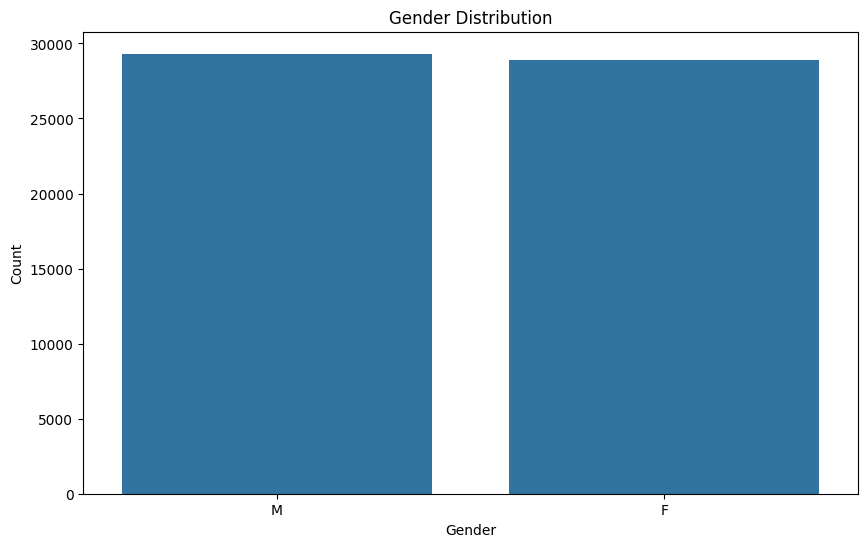

In [53]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=adventure_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



### Interpretation:
The bar chart for Gender Distribution shows that the customer base is nearly evenly split between males (M) and females (F). Both genders have similar representation, with the count of male customers slightly higher than that of female customers. This indicates that the products appeal to both genders almost equally, suggesting that marketing efforts can be effectively targeted towards both male and female demographics to maximize reach and engagement.

### Analyze Sales Trends Over Time

### Identify Top-Selling Products and Categories

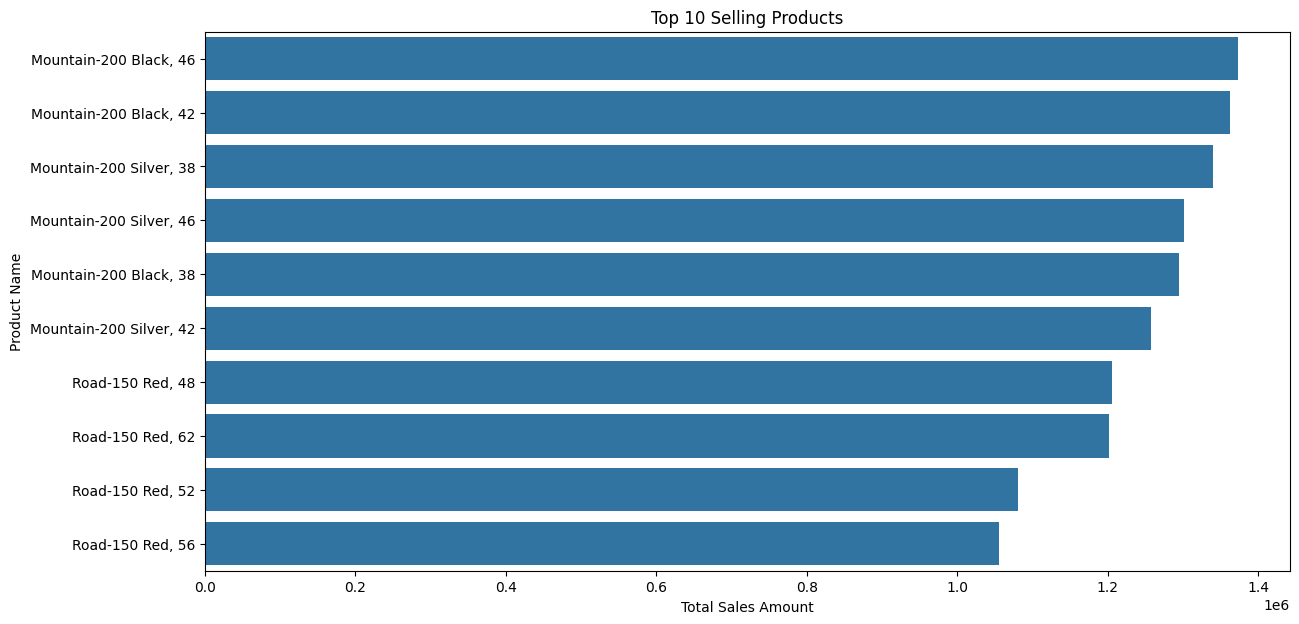

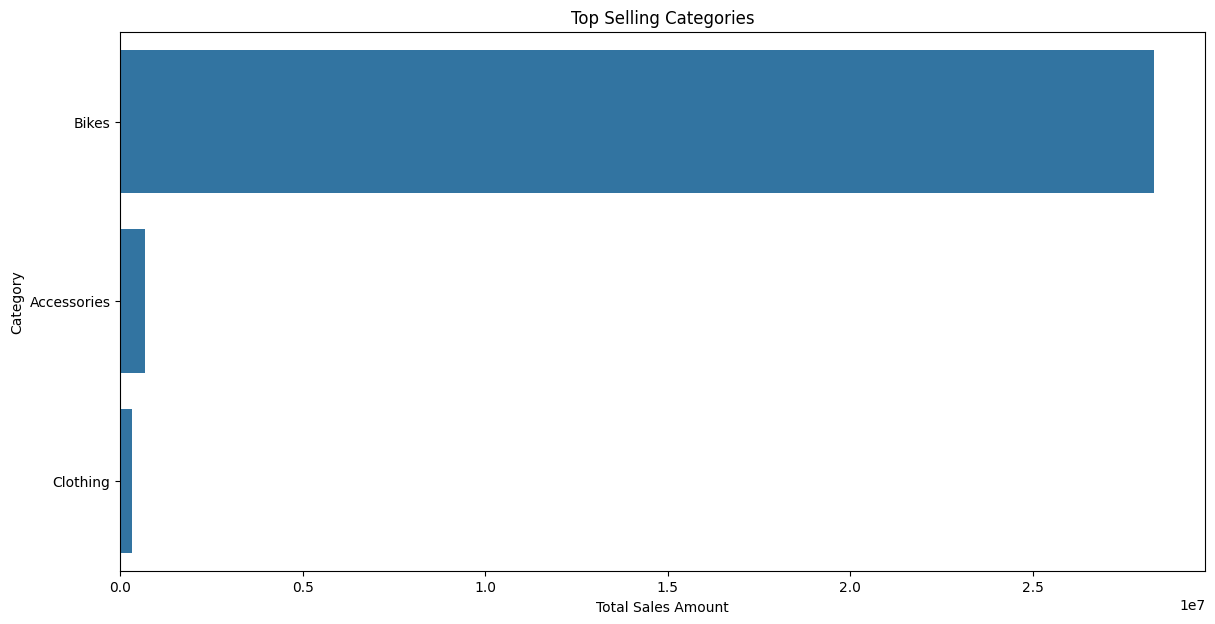

In [54]:
# Group by ProductName and calculate total sales
top_products = adventure_data.groupby('ProductName')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top 10 selling products
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ProductName', data=top_products.head(10))
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.show()

# Group by Category and calculate total sales
top_categories = adventure_data.groupby('Category')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top 10 selling categories
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Category', data=top_categories.head(10))
plt.title('Top Selling Categories')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()


### Interpretation:
The bar chart for the Top 10 Selling Products shows that "Mountain-200 Black, 46" is the highest-selling product, followed closely by other variants of "Mountain-200" and "Road-150". The "Mountain-200" series dominates the top ranks, indicating it is the most popular product line. The "Road-150" series also performs well, securing multiple spots in the top 10. This suggests that focusing on these popular product lines could be beneficial for driving sales.

The bar chart for the Top 10 Selling Categories shows that "Bikes" is the dominant category, significantly outperforming "Accessories" and "Clothing." This indicates that the majority of sales revenue comes from bikes, with accessories and clothing contributing much smaller portions. Focusing on the bikes category while exploring growth opportunities in accessories and clothing could be a strategic approach for increasing overall sales.

# Segment Customers Based on Demographics and Purchasing Behavior

In [55]:
# Group by CustomerKey and calculate total sales and total order quantity
customer_segments = adventure_data.groupby('CustomerKey').agg({
    'SalesAmount': 'sum',
    'OrderQuantity': 'sum',
    'YearlyIncome': 'mean',
    'TotalChildren': 'mean',
    'NumberChildrenAtHome': 'mean',
    'Education': 'first',
    'Occupation': 'first',
    'HouseOwnerFlag': 'mean',
    'NumberCarsOwned': 'mean',
    'Gender': 'first',
    'CommuteDistance': 'first'
}).reset_index()

# Display the first few rows of customer segments
print(customer_segments.head())


   CustomerKey  SalesAmount  OrderQuantity  YearlyIncome  TotalChildren  \
0        11000      8248.99              9       90000.0            2.0   
1        11001      6383.88             17       60000.0            3.0   
2        11002      8114.04              4       60000.0            3.0   
3        11003      8139.29             10       70000.0            0.0   
4        11004      8196.01              8       80000.0            5.0   

   NumberChildrenAtHome  Education    Occupation  HouseOwnerFlag  \
0                   0.0  Bachelors  Professional             1.0   
1                   3.0  Bachelors  Professional             0.0   
2                   3.0  Bachelors  Professional             1.0   
3                   0.0  Bachelors  Professional             0.0   
4                   5.0  Bachelors  Professional             1.0   

   NumberCarsOwned Gender CommuteDistance  
0              0.0      M       1-2 Miles  
1              1.0      M       0-1 Miles  
2       

### Visualize Customer Segments

### Education Level Distribution

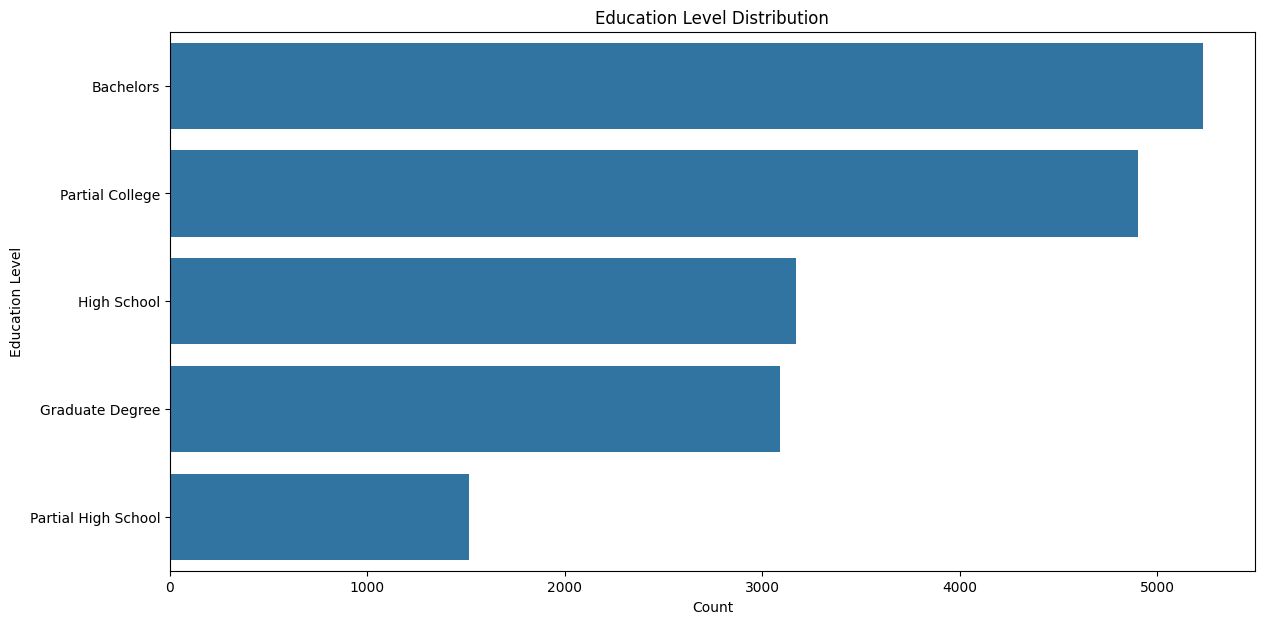

In [56]:
# Plot education level distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='Education', data=customer_segments, order=customer_segments['Education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

### Interpretation:
The bar chart for Education Level Distribution shows that the majority of customers hold a Bachelor's degree, followed by those with partial college education. High School and Graduate Degree holders are also well-represented, while customers with only partial high school education form the smallest group. This suggests that the customer base is predominantly well-educated, with a significant portion having completed higher education.

### Income Distribution

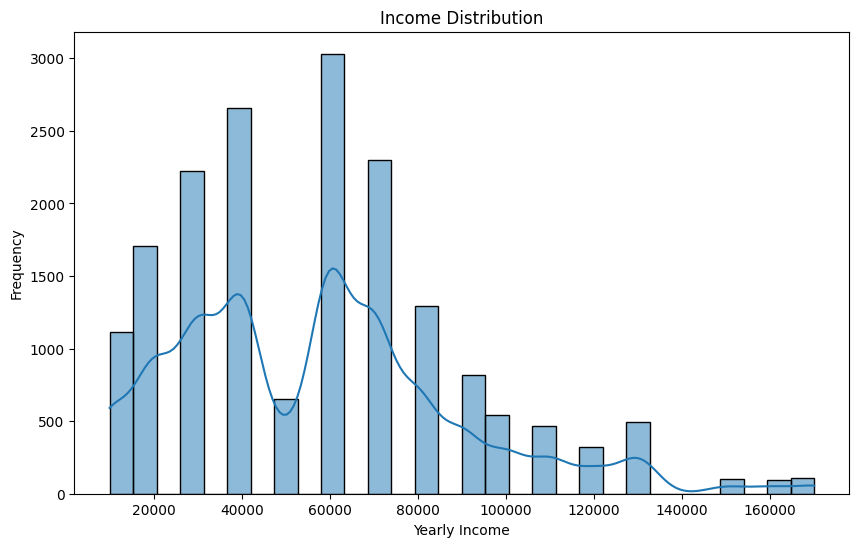

In [57]:
# Plot income distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_segments['YearlyIncome'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()


### Interpretation:
The Income Distribution histogram shows that most customers have yearly incomes between $20,000 and $80,000, with the peak frequency around $60,000. There are fewer customers with incomes above $100,000, indicating a smaller affluent segment. The distribution is right-skewed, suggesting that while the majority earn moderate incomes, there are some higher earners in the dataset. This highlights a diverse income range within the customer base.

### Study Product Line and Model Preferences

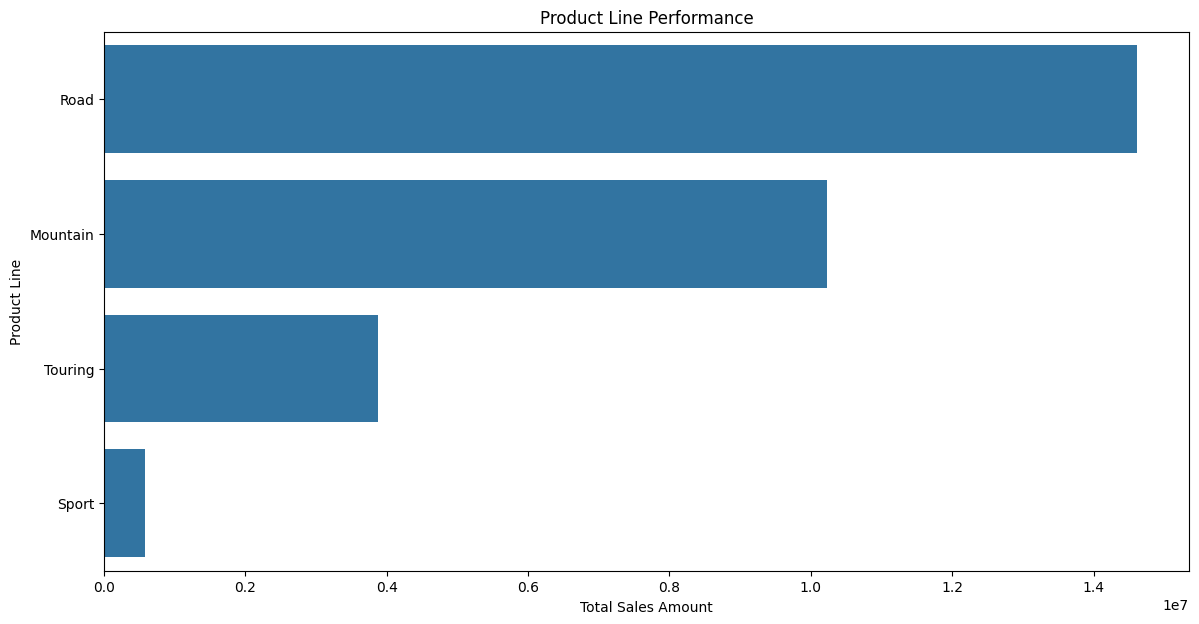

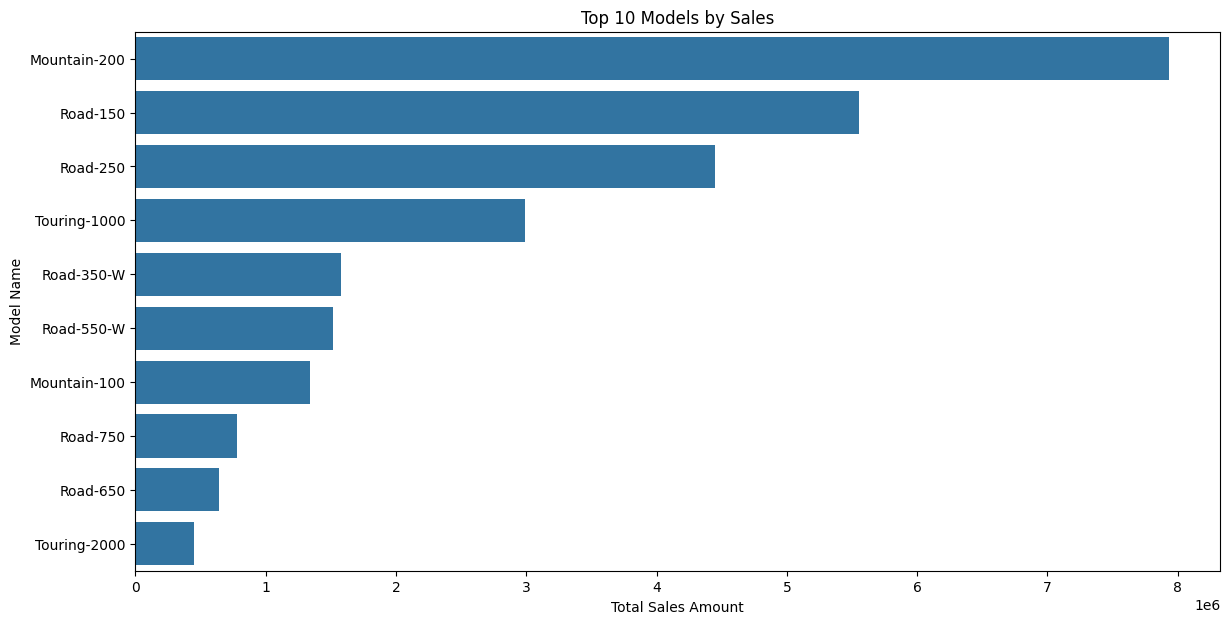

In [58]:
# Group by ProductLine and calculate total sales
product_line_performance = adventure_data.groupby('ProductLine')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top product lines by sales
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ProductLine', data=product_line_performance)
plt.title('Product Line Performance')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Line')
plt.show()

# Group by ModelName and calculate total sales
model_performance = adventure_data.groupby('ModelName')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top models by sales
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ModelName', data=model_performance.head(10))
plt.title('Top 10 Models by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Model Name')
plt.show()


### Interpretation
#### Product Line Performance 
This bar chart illustrates the performance of different product lines based on total sales amount:

- **Road** products are the highest-performing line, with sales exceeding 1.4 million units, indicating a strong customer preference.
- **Mountain** products follow with substantial sales, although significantly lower than Road products.
- **Touring** products have moderate sales, indicating a niche but dedicated market segment.
- **Sport** products have the lowest sales, suggesting either a smaller market or lower demand compared to other product lines.

Overall, Road products dominate the market, followed by Mountain and Touring, with Sport products trailing behind.

#### Top 10 Models by Sales

This bar chart illustrates the top 10 models by sales amount:

- **Mountain-200** is the highest-selling model, significantly outperforming other models.
- **Road-150** and **Road-250** follow as the second and third highest-selling models, respectively.
- **Touring-1000** also shows strong sales performance, ranking fourth.
- Other models like **Road-350-W**, **Road-550-W**, and **Mountain-100** have moderate sales.
- Models like **Road-750**, **Road-650**, and **Touring-2000** have lower sales compared to the top-performing models.

Overall, Mountain and Road models dominate the top-selling list, indicating their popularity and strong customer demand.

# Market Analysis:

### Analyzing Sales by Region, Country, and Sales Group

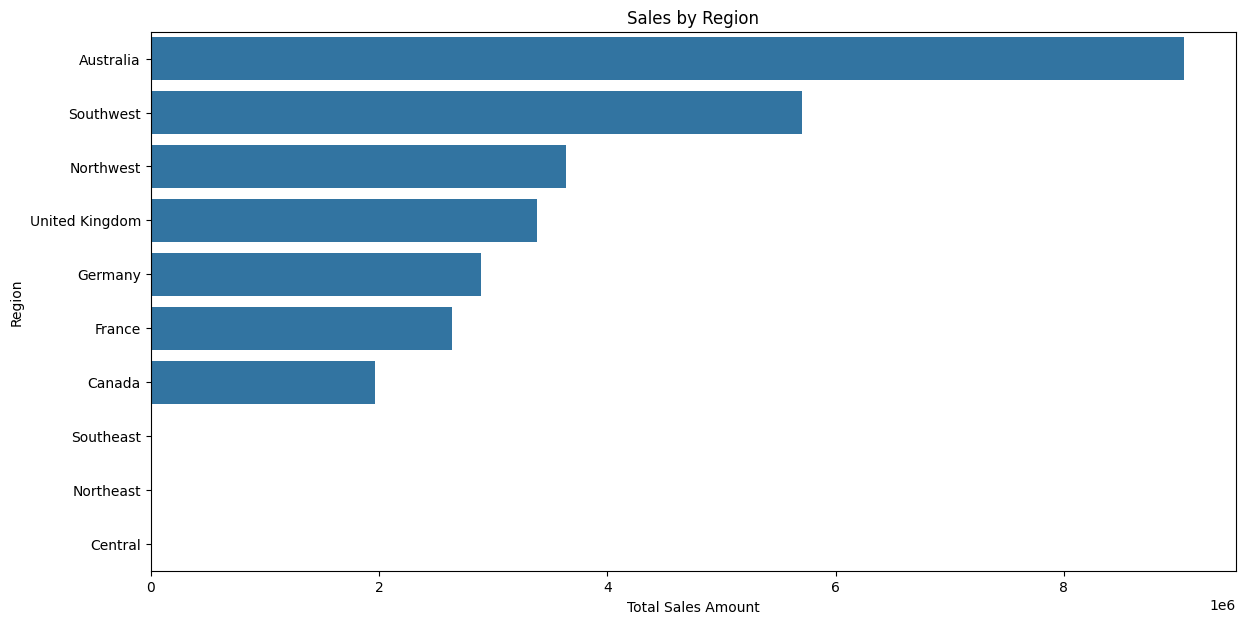

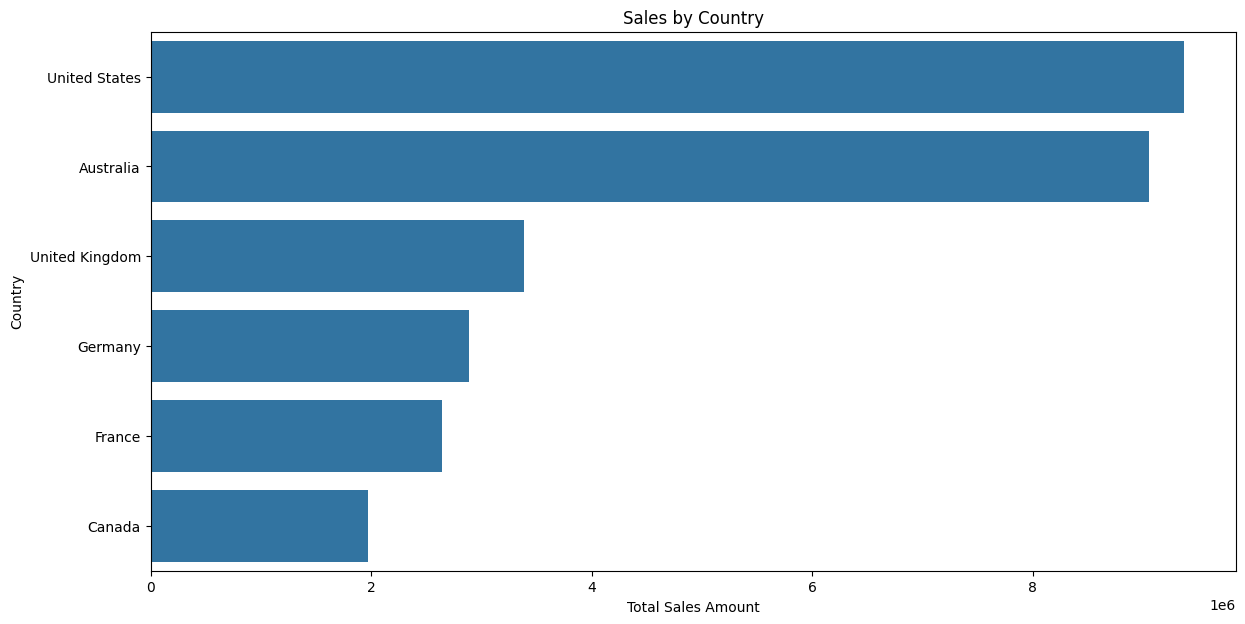

In [59]:
# Group by Region and calculate total sales
sales_by_region = adventure_data.groupby('Region')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by region
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Region', data=sales_by_region)
plt.title('Sales by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()

# Group by Country and calculate total sales
sales_by_country = adventure_data.groupby('Country')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by country
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Country', data=sales_by_country)
plt.title('Sales by Country')
plt.xlabel('Total Sales Amount')
plt.ylabel('Country')
plt.show()

### Interpretation of the Three Graphs:

1. **Sales by Region:**
   - The graph shows that Australia leads in sales, followed by the Southwest and Northwest regions.
   - The United Kingdom, Germany, and France have moderate sales, while Southeast, Northeast, and Central regions have the least sales.

2. **Sales by Country:**
   - The United States has the highest sales, followed closely by Australia.
   - The United Kingdom, Germany, and France also have significant sales, whereas Canada has the lowest sales among the countries displayed.
These visualizations indicate that the North American and Pacific regions are strong markets, with specific countries like the United States and Australia driving significant sales.

## Analyzing Sales Performance by Fiscal Periods


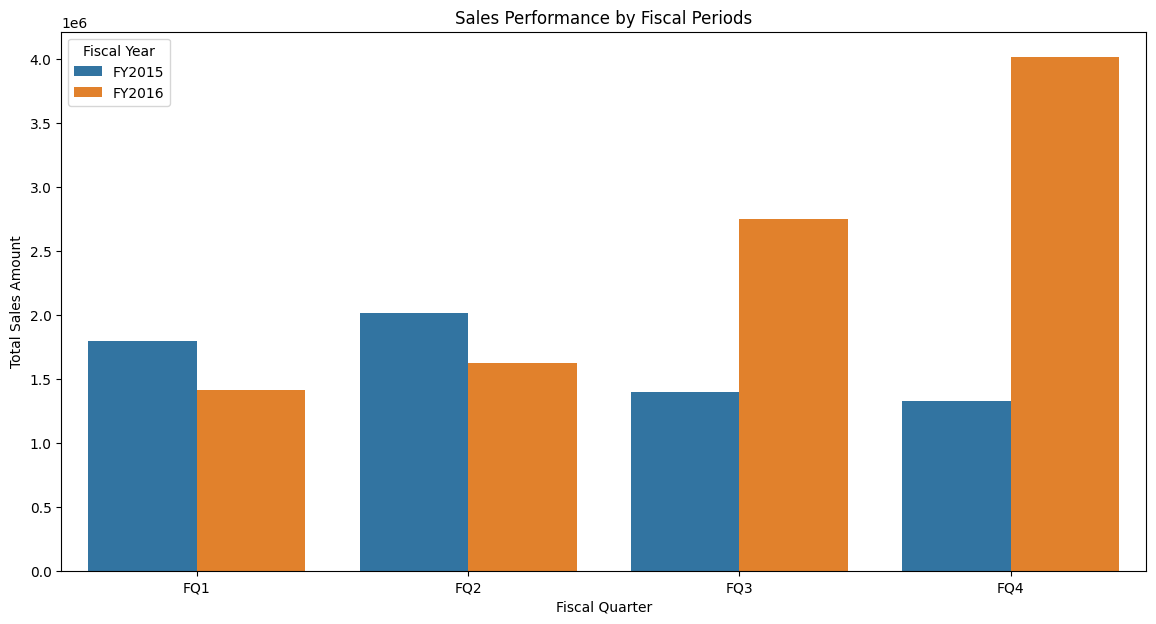

In [60]:
# Ensure all fiscal years and quarters appear in the dataset
fiscal_years = [ 'FY2015', 'FY2016', ]
fiscal_quarters = ['FQ1', 'FQ2', 'FQ3', 'FQ4']

# Create a full combination of all years and quarters
full_index = pd.MultiIndex.from_product([fiscal_years, fiscal_quarters], names=['FiscalYear', 'FiscalQuarter'])

# Aggregate sales data
sales_by_fiscal_period = adventure_data.groupby(['FiscalYear', 'FiscalQuarter'])['SalesAmount'].sum().reset_index()

# Reindex the dataframe to include all combinations of years and quarters
sales_by_fiscal_period = sales_by_fiscal_period.set_index(['FiscalYear', 'FiscalQuarter']).reindex(full_index).fillna(0).reset_index()

# Plot sales performance by fiscal periods
plt.figure(figsize=(14, 7))
sns.barplot(x='FiscalQuarter', y='SalesAmount', hue='FiscalYear', data=sales_by_fiscal_period)
plt.title('Sales Performance by Fiscal Periods')
plt.xlabel('Fiscal Quarter')
plt.ylabel('Total Sales Amount')
plt.legend(title='Fiscal Year')
plt.show()

In [61]:
# Import the dataset named 'budget_data.csv'
budget_data = pd.read_csv('budget_data.csv')

# Display the first few rows of the dataframe to verify the import
budget_data.head()

,Category,Subcategory,ProductName,Jan_2016,Feb_2016,Mar_2016,Apr_2016,May_2016,Jun_2016,Jul_2016,Aug_2016,Sep_2016,Oct_2016,Nov_2016,Dec_2016,Grand_Total
0,Accessories,Bike Racks,Hitch Rack - 4-Bike,1131,2635,4134,2179,2637,3279,2218,3287,3885,2484,5441,3551,36861
1,Accessories,Bike Stands,All-Purpose Bike Stand,666,3695,2868,4862,3439,4612,2774,3003,2401,4413,3881,2143,38757
2,Accessories,Bottles and Cages,Water Bottle - 30 oz.,1892,4727,3656,4449,4051,6257,4871,5231,5461,5529,5220,6025,57369
3,Accessories,Cleaners,Bike Wash - Dissolver,160,713,555,656,369,582,777,777,239,496,686,455,6465
4,Accessories,Fenders,Fender Set - Mountain,970,3014,2809,4259,3638,3721,4190,3618,3975,3892,4740,4844,43670


In [62]:
# Convert the data to long format for easier plotting
budget_data_long = pd.melt(budget_data, 
                           id_vars=['Category', 'Subcategory', 'ProductName', 'Grand_Total'], 
                           var_name='Month', 
                           value_name='SalesAmount')


In [63]:
# Convert 'Month' to a proper datetime format (assuming the month column names are in 'MMM_YYYY' format)
budget_data_long['Month'] = pd.to_datetime(budget_data_long['Month'], format='%b_%Y')


In [64]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [65]:
# Check the column names
print(budget_data.columns)


Index(['Category', 'Subcategory', 'ProductName', 'Jan_2016', 'Feb_2016',
       'Mar_2016', 'Apr_2016', 'May_2016', 'Jun_2016', 'Jul_2016', 'Aug_2016',
       'Sep_2016', 'Oct_2016', 'Nov_2016', 'Dec_2016', 'Grand_Total'],
      dtype='object')


## Category/Subcategory Analysis:

In [66]:
# Group by Category and Subcategory and sum the SalesAmount
category_sales = budget_data_long.groupby(['Category', 'Subcategory'])['SalesAmount'].sum().reset_index()


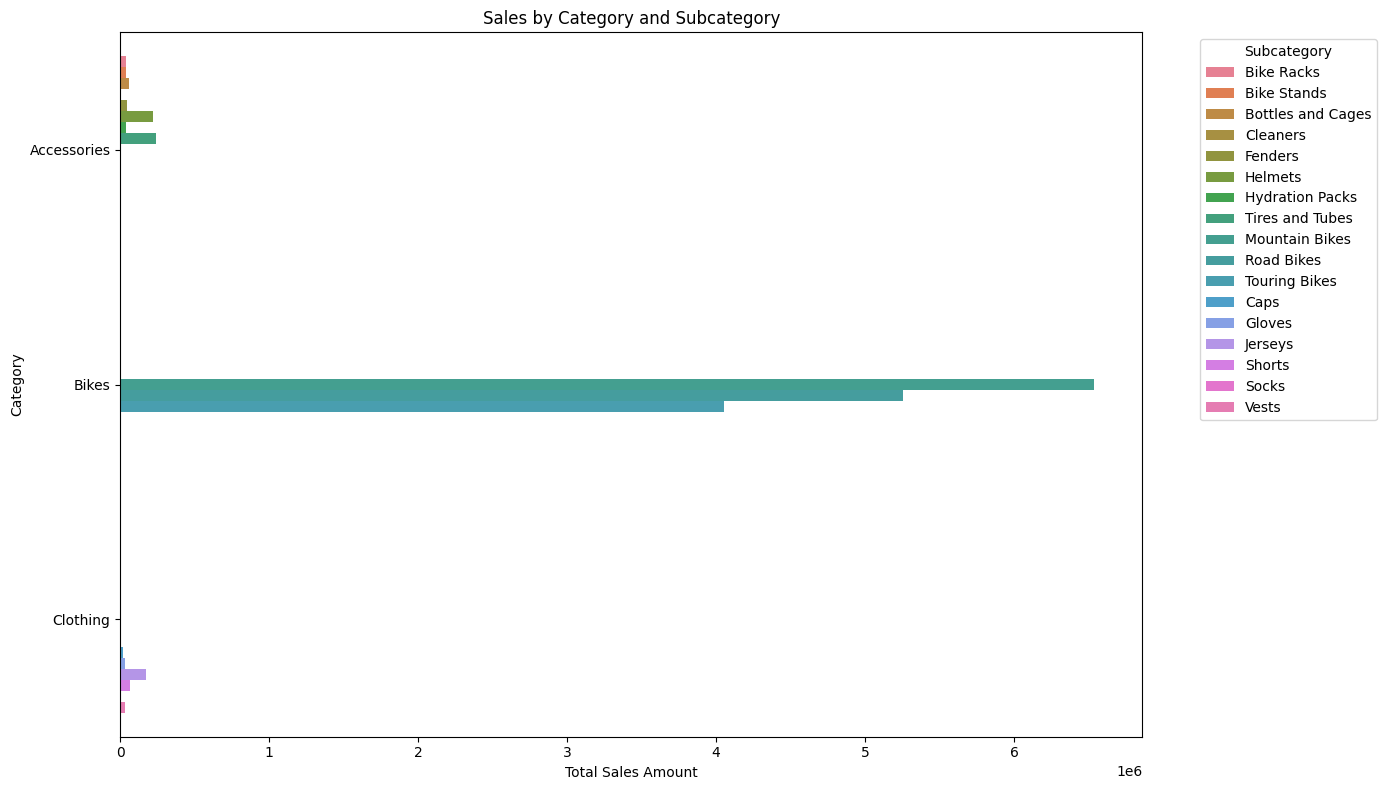

In [67]:
# Plot the sales by Category and Subcategory
plt.figure(figsize=(14, 8))
sns.barplot(data=category_sales, x='SalesAmount', y='Category', hue='Subcategory')
plt.title('Sales by Category and Subcategory')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation

1. **Category Dominance**:
   - "Bikes" category dominates sales.

2. **Top Subcategories**:
   - In "Bikes": "Mountain Bikes" and "Road Bikes" are top sellers.
   - In "Accessories": "Helmets" and "Tires and Tubes" stand out.
   - In "Clothing": "Jerseys" and "Gloves" lead sales.

3. **Sales Contribution**:
   - "Mountain Bikes" and "Road Bikes" significantly drive total sales. 
   - "Accessories" and "Clothing" have smaller, more evenly distributed sales.

### Contribution to Grand Total:

### Calculate Monthly Contribution to Grand Total

In [68]:
# Group by Month and sum the SalesAmount to get total sales per month
monthly_sales = budget_data_long.groupby('Month')['SalesAmount'].sum().reset_index()

# Calculate the grand total sales
grand_total_sales = monthly_sales['SalesAmount'].sum()

# Calculate the contribution of each month to the grand total
monthly_sales['Contribution (%)'] = (monthly_sales['SalesAmount'] / grand_total_sales) * 100

# Display the monthly sales with their contributions
print(monthly_sales)


        Month  SalesAmount  Contribution (%)
0  2016-01-01       871119          5.163847
1  2016-02-01       858350          5.088155
2  2016-03-01       999795          5.926617
3  2016-04-01      1131721          6.708652
4  2016-05-01      1226351          7.269603
5  2016-06-01      1713430         10.156925
6  2016-07-01      1354917          8.031720
7  2016-08-01      1577564          9.351534
8  2016-09-01      1507678          8.937262
9  2016-10-01      1674817          9.928034
10 2016-11-01      1975436         11.710053
11 2016-12-01      1978396         11.727599


### Interpretation

The data shows the monthly sales amounts for the year 2016 along with their contribution percentages to the annual total:

1. **Top Contributing Months:**
   - **November and December** are the highest contributing months, each accounting for approximately 11.7% of the annual sales.
   - **June** also has a significant contribution at 10.16%.

2. **Consistent Performance:**
   - The months from **January to May** contribute steadily, each ranging from 5.16% to 7.27%.
   - Contributions increase from **March** onwards, peaking in the last two months of the year.

3. **Sales Peaks and Patterns:**
   - Sales peak significantly in **November and December**, likely indicating seasonal trends or promotional events.
   - There is a noticeable

In [69]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

# Business Problem

## Promotion Effectiveness Analysis
### Business Problem: Evaluate the effectiveness of different promotions on sales across various territories.

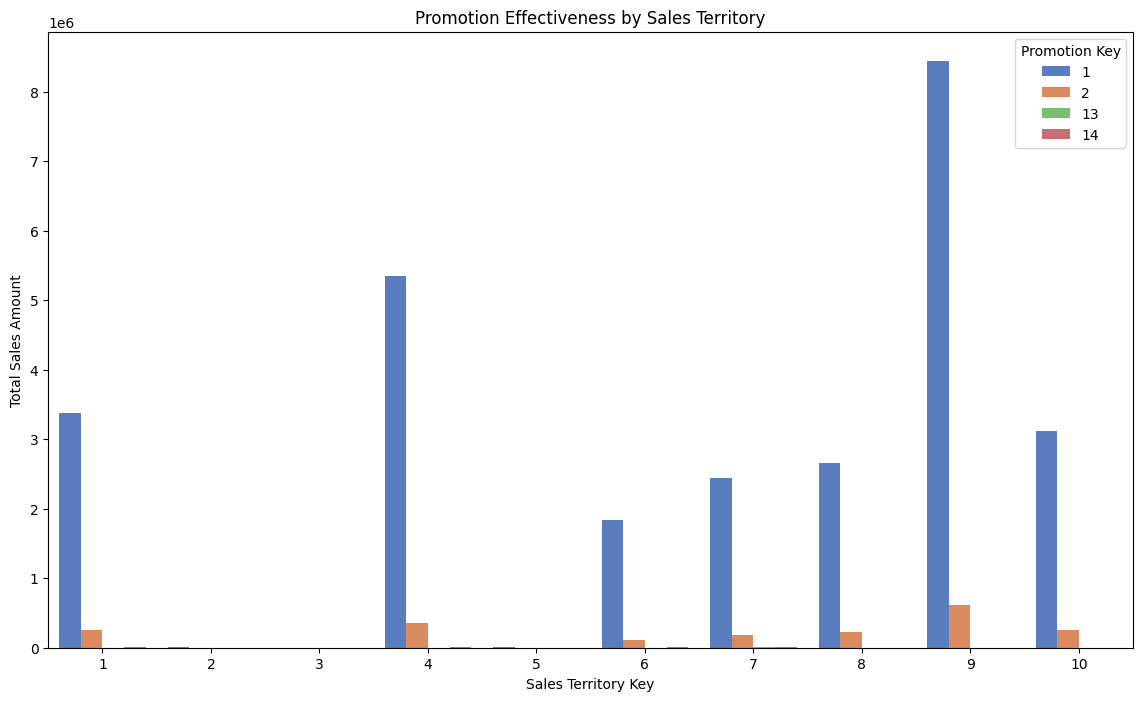

In [70]:
# Analyze sales by promotion key and sales territory
promotion_effectiveness = adventure_data.groupby(['PromotionKey', 'SalesTerritoryKey'])['SalesAmount'].sum().reset_index()

# Plotting the promotion effectiveness using a single bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=promotion_effectiveness, x='SalesTerritoryKey', y='SalesAmount', hue='PromotionKey', palette='muted')
plt.title('Promotion Effectiveness by Sales Territory')
plt.xlabel('Sales Territory Key')
plt.ylabel('Total Sales Amount')
plt.legend(title='Promotion Key', loc='upper right')
plt.show()

### Interpretation:
1. **Promotion Key 1**: This promotion has the highest sales amount across most sales territories, with especially high sales in territories 1, 4, 6, 7, 8, 9, and 10.
2. **Promotion Key 2**: This promotion shows very minimal sales impact across all territories, indicating it might not be as effective.
3. **Promotion Key 13 and 14**: Both of these promotions show limited sales impact, with only slight effectiveness in a few territories.

### Solution to the Business Problem:
Based on the visualization, we can infer the following:

1. **Effectiveness of Promotions**:
   - Promotion Key 1 is clearly the most effective promotion, contributing significantly to sales in multiple territories. This promotion strategy should be analyzed further to understand the factors driving its success and potentially replicate these factors in other promotions.
   - Promotion Key 2, 13, and 14 are not generating significant sales. These promotions should be reviewed to identify why they are underperforming. Factors such as the type of promotion, marketing approach, product fit, and customer preferences should be evaluated.

2. **Sales Territory Focus**:
   - Territories 4 and 9 show the highest sales under Promotion Key 1. These territories could be further targeted with additional promotions or marketing efforts to maximize sales.
   - Other territories, such as 2 and 5, show minimal sales across all promotions, indicating potential untapped markets. Investigating the reasons behind low sales in these territories could reveal opportunities for market expansion.

3. **Strategic Adjustments**:
   - **Revise Promotion Strategies**: For underperforming promotions (Key 2, 13, and 14), consider revising the promotion structure. This could include changing the discount rates, bundling products, or targeting different customer segments.
   - **Focus on Successful Promotions**: Leverage the strategies used in Promotion Key 1 for other promotions. Ensure that successful elements such as marketing channels, messaging, and timing are applied to other promotions.
   - **Territory-Specific Approaches**: Develop territory-specific marketing plans. For high-performing territories, continue to support and possibly increase promotional efforts. For low-performing territories, conduct market research to understand customer needs and preferences better.

### Action Plan:
1. **Conduct a Detailed Analysis**: Dive deeper into the data for Promotion Key 1 to identify what makes it successful. Look at customer feedback, promotion channels, and the types of products included.
2. **Revamp Underperforming Promotions**: Based on the insights from the successful promotion, redesign the underperforming promotions. Test these new strategies in select territories before a full rollout.
3. **Territory Research**: Perform market research in territories with low sales. Understand the local competition, customer demographics, and preferences. Tailor promotions to address these specific needs.
4. **Monitor and Adjust**: Continuously monitor the performance of promotions and territories. Use this data to make real-time adjustments to marketing strategies and promotions.

By following this approach, the company can enhance its promotional strategies, optimize sales across different territories, and ultimately drive higher overall sales.

## Product Profitability Analysis
### Business Problem: Determine which products are the most and least profitable to guide future product development and marketing strategies.

C:\Users\suriy\AppData\Local\Temp\ipykernel_6476\2372767126.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_profitability.sort_values(by='Profit', ascending=False).head(10), x='Profit', y='ProductName', palette='coolwarm')


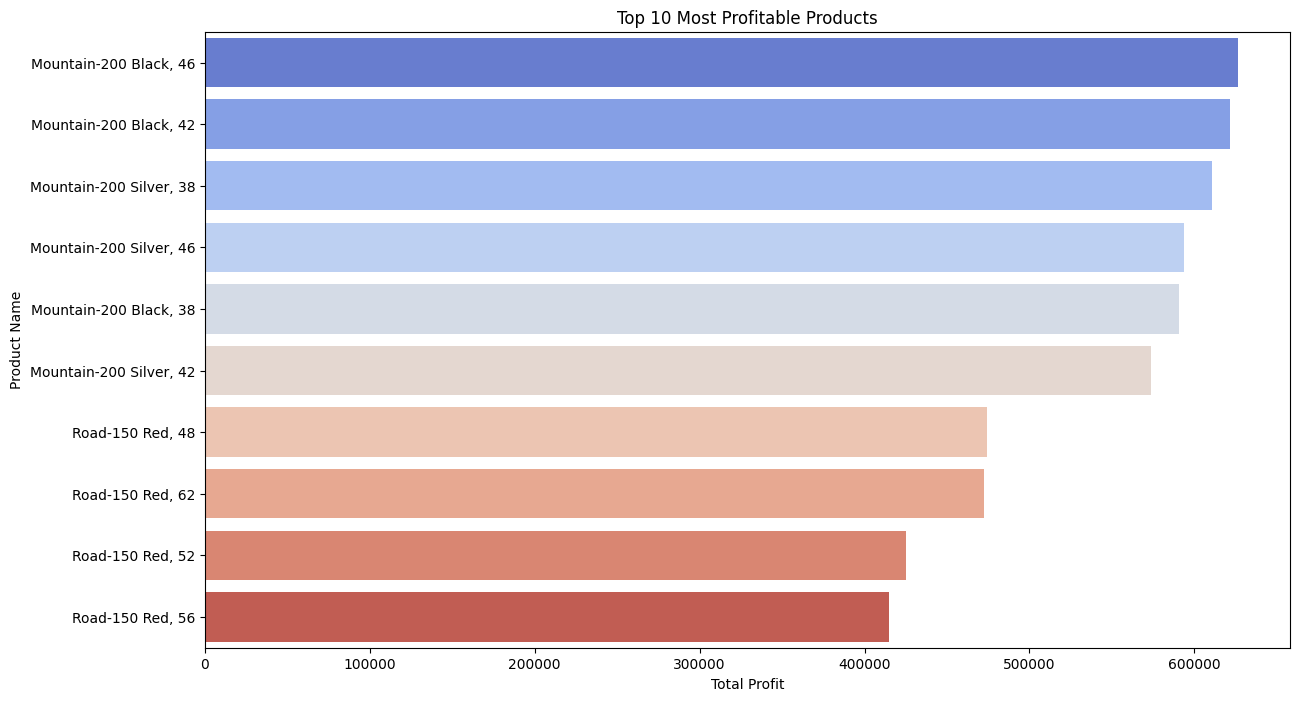

In [71]:
# Calculate profitability for each product
adventure_data['Profit'] = adventure_data['SalesAmount'] - adventure_data['TotalProductCost']
product_profitability = adventure_data.groupby('ProductName')['Profit'].sum().reset_index()

# Plotting product profitability
plt.figure(figsize=(14, 8))
sns.barplot(data=product_profitability.sort_values(by='Profit', ascending=False).head(10), x='Profit', y='ProductName', palette='coolwarm')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()


### Interpretation:
1. **Most Profitable Products**:
   - **Mountain-200 Black and Silver**: These variations dominate the top positions, indicating they are the most profitable products. They appear multiple times with different product keys (e.g., 46, 42, 38).
   - **Road-150 Red**: This product also features prominently among the top profitable products, with multiple product keys (e.g., 48, 62, 52, 56).

2. **Profit Distribution**:
   - The profit from the Mountain-200 series, both Black and Silver variants, significantly surpasses that of other products.
   - The Road-150 Red series, although not as profitable as the Mountain-200 series, still shows strong profitability.

### Solution to the Business Problem:
Given the insights from the product profitability analysis, the company should consider the following strategies:

1. **Focus on High-Profit Products**:
   - **Increase Production and Marketing**: For the Mountain-200 Black and Silver variants, and the Road-150 Red series, consider increasing production volumes. Additionally, allocate more marketing resources to these products to further boost their sales.
   - **Product Enhancements**: Analyze what makes these products successful—be it features, quality, pricing, or marketing strategies—and apply these insights to enhance other products.

2. **Strategic Pricing and Promotion**:
   - **Price Adjustments**: Evaluate if price adjustments can further maximize profits for the top-performing products. Consider premium pricing strategies if these products have high demand and perceived value.
   - **Promotions and Discounts**: Tailor promotions to encourage repeat purchases or bulk buying for these profitable products. However, ensure that promotions do not significantly erode profit margins.

3. **Product Line Expansion**:
   - **New Variants**: Based on the success of the Mountain-200 and Road-150 series, develop new variants or similar products that cater to customer preferences and trends observed in these series.
   - **Customer Feedback**: Collect and analyze customer feedback on these top products to identify potential areas for improvement or new features that can be incorporated into future products.

4. **Resource Allocation**:
   - **Optimize Resources**: Allocate more resources (R&D, marketing, production) towards the development and promotion of these high-profit products.
   - **Reduce Focus on Low-Profit Products**: Conversely, consider discontinuing or reducing resources for products that consistently show low profitability. Redirect these resources to more profitable ventures.

5. **Inventory Management**:
   - **Stock Management**: Ensure that inventory levels for these high-demand, high-profit products are optimized to avoid stockouts or overstocking, which can impact profitability.

### Action Plan:
1. **Detailed Analysis**: Conduct a deeper analysis into the factors driving the profitability of the Mountain-200 and Road-150 series. This includes customer demographics, purchase behavior, and market trends.
2. **Customer Insights**: Use customer surveys and feedback to understand why these products are preferred and identify potential improvements or new features.
3. **Marketing Campaigns**: Design targeted marketing campaigns for these products, emphasizing their benefits and unique selling points. Use data-driven insights to tailor campaigns to specific customer segments.
4. **Sales Monitoring**: Continuously monitor sales and profitability metrics for these products to ensure they remain profitable and adjust strategies as needed based on market conditions and competition.

By implementing these strategies, the company can capitalize on the success of its most profitable products, driving higher overall profitability and sustaining business growth.

In [72]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [73]:
budget_data_long.info

<bound method DataFrame.info of         Category        Subcategory                 ProductName  Grand_Total  \
0    Accessories         Bike Racks         Hitch Rack - 4-Bike        36861   
1    Accessories        Bike Stands      All-Purpose Bike Stand        38757   
2    Accessories  Bottles and Cages       Water Bottle - 30 oz.        57369   
3    Accessories           Cleaners       Bike Wash - Dissolver         6465   
4    Accessories            Fenders       Fender Set - Mountain        43670   
..           ...                ...                         ...          ...   
199     Clothing             Gloves       Half-Finger Gloves, S        33965   
200     Clothing            Jerseys  Long-Sleeve Logo Jersey, S       170938   
201     Clothing             Shorts      Men's Sports Shorts, S        68453   
202     Clothing              Socks      Mountain Bike Socks, M         5449   
203     Clothing              Vests             Classic Vest, S        34565   

       

## Business Problem: Identifying Seasonal Sales Trends
### Objective:Identify seasonal trends in sales across different product categories and subcategories to optimize inventory and marketing strategies.

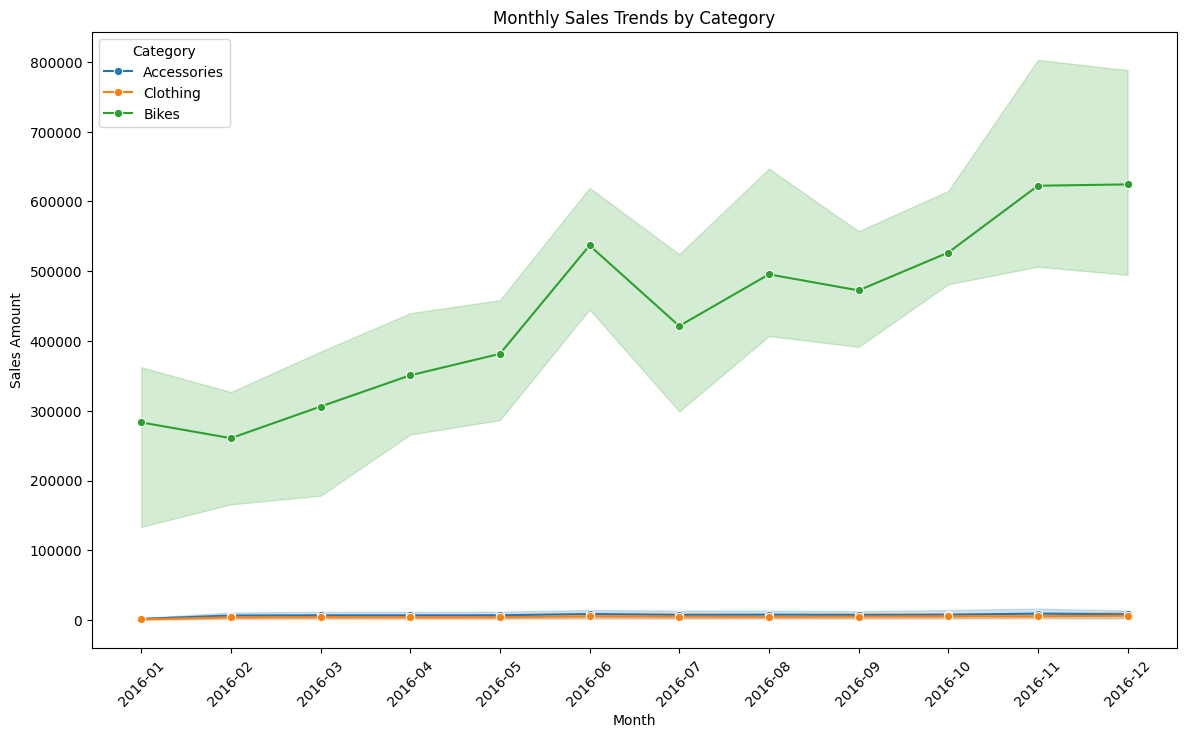

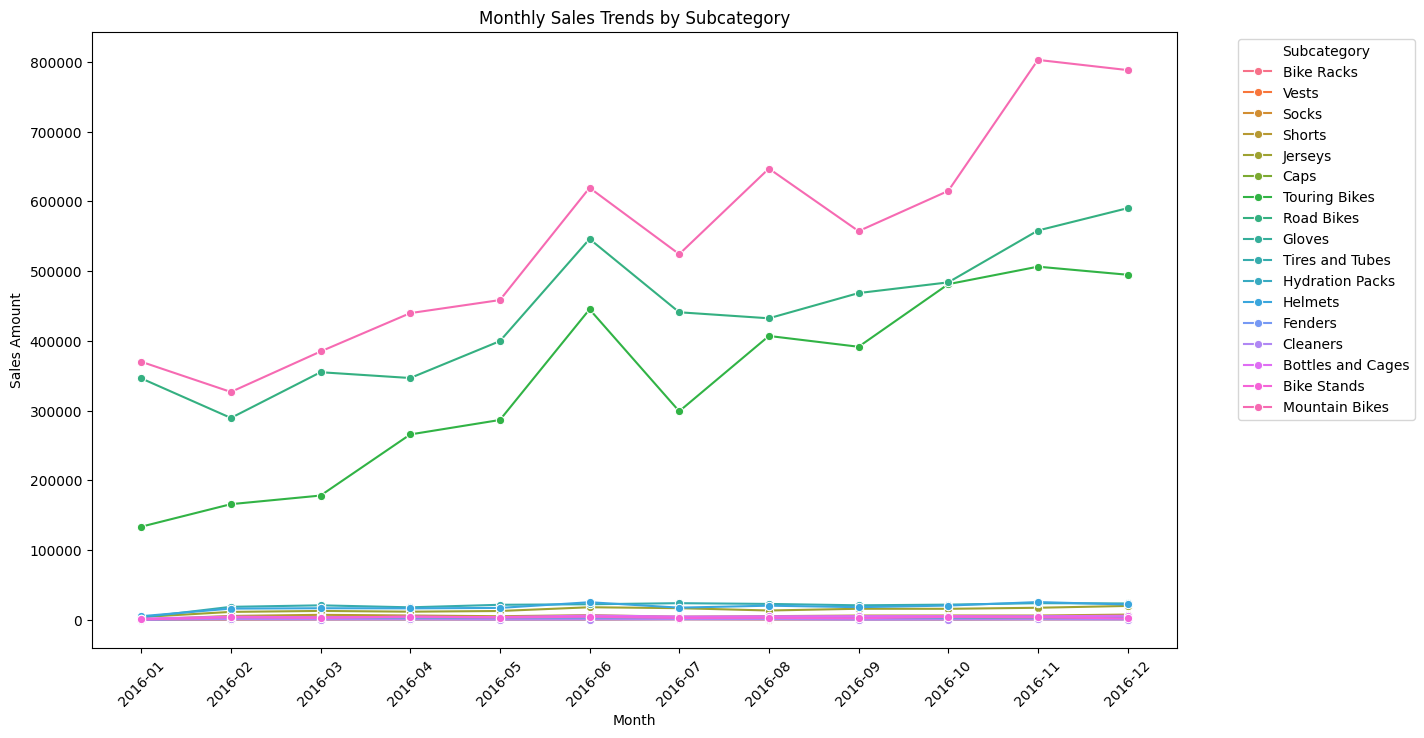

In [74]:
# Aggregate sales data by month and category
monthly_sales = budget_data_long.groupby(['Month', 'Category', 'Subcategory'])['SalesAmount'].sum().reset_index()

# Convert 'Month' to datetime for better plotting
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Set the order of months for consistent plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.strftime('%Y-%m')
monthly_sales = monthly_sales.sort_values(by='Month')

# Plot the seasonal trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue='Category', marker='o')
plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

# Plot the seasonal trends for each subcategory within categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue='Subcategory', marker='o')
plt.title('Monthly Sales Trends by Subcategory')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Interpretation

**Monthly Sales Trends by Category:**

1. **Bikes:** This category shows a significant upward trend over the year, indicating strong and growing sales. The sales start at around 300,000 and rise steadily, peaking at approximately 700,000 by the end of the year.
2. **Accessories and Clothing:** These categories have relatively flat sales trends, with minimal fluctuations and much lower sales amounts compared to Bikes. 

**Monthly Sales Trends by Subcategory:**

1. **Mountain Bikes and Road Bikes:** These subcategories dominate the sales, with consistent growth throughout the year. Mountain Bikes show higher sales compared to Road Bikes, especially noticeable from mid-year onwards.
2. **Other Subcategories:** Most other subcategories such as Bike Stands, Bottles and Cages, and Clothing items (like Jerseys and Gloves) show relatively stable but low sales across the months, without significant spikes or dips.

### Business Problem: Inventory and Sales Strategy Optimization

**Objective:**
To optimize inventory and sales strategies by identifying high-demand categories and subcategories, and reallocating resources to maximize sales and reduce stockouts.

**Solution Steps:**

1. **Focus on High-Demand Categories:**
   - Allocate more resources to the Bikes category, particularly Mountain Bikes and Road Bikes, as they show the highest sales growth.
   - Ensure adequate stock levels and timely restocking for these high-demand items to meet customer demand and avoid lost sales opportunities.

2. **Monitor Low-Demand Categories:**
   - For Accessories and Clothing, consider strategies to boost sales, such as targeted promotions, discounts, or bundling offers.
   - Analyze customer feedback and market trends to understand the lower demand and adjust the product offerings accordingly.

3. **Adjust Marketing Strategies:**
   - Increase marketing efforts for high-performing subcategories like Mountain Bikes and Road Bikes to further boost their sales.
   - Implement promotional campaigns for lower-performing subcategories to increase visibility and attract more customers.

4. **Dynamic Pricing Strategy:**
   - Consider dynamic pricing for high-demand products to maximize revenue during peak sales periods.
   - Offer discounts or special deals for products with lower sales to stimulate demand.

5. **Seasonal Analysis:**
   - Perform a detailed seasonal analysis to identify any specific periods where certain categories or subcategories see increased sales.
   - Align inventory and marketing strategies with these seasonal trends to capitalize on peak demand periods.

This approach and the code provided will help to identify key trends and inform strategic decisions to optimize sales and inventory management effectively.

### Business Problem: Product Performance Analysis
### Problem: Evaluate the performance of different products to identify top-performing products and those that need marketing or product improvement efforts.

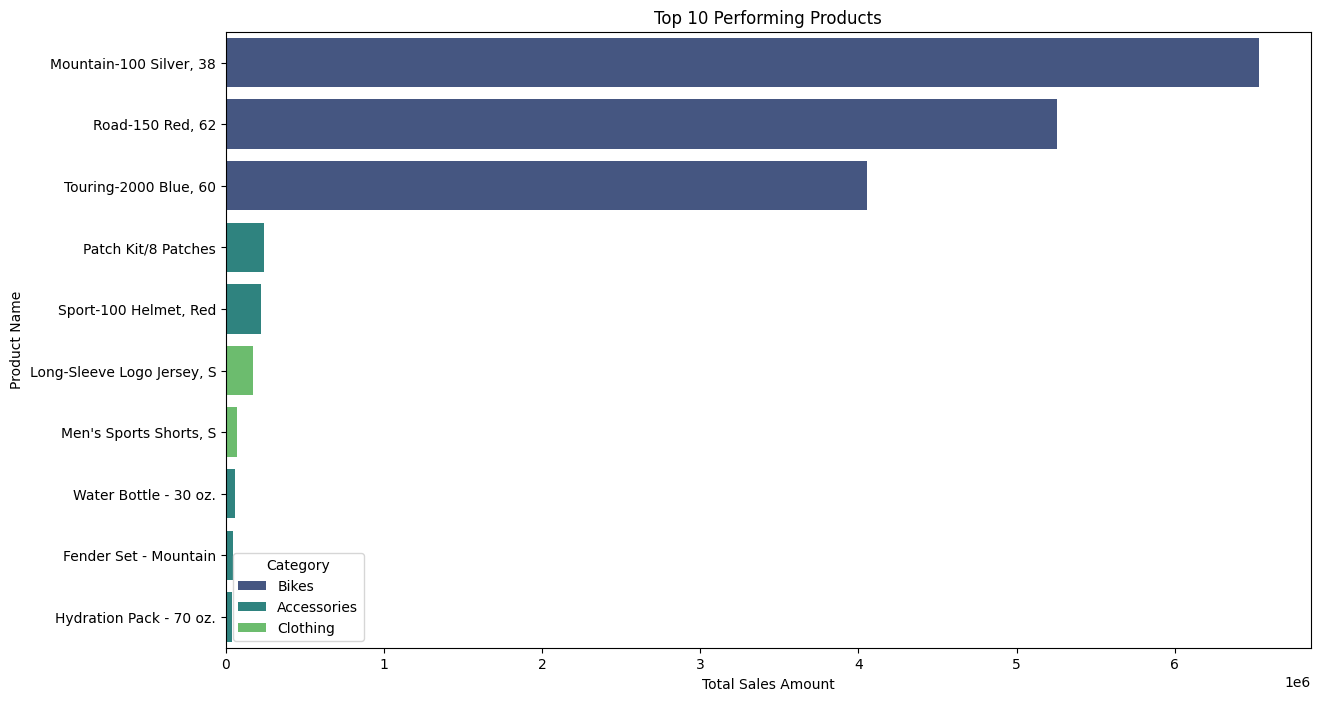

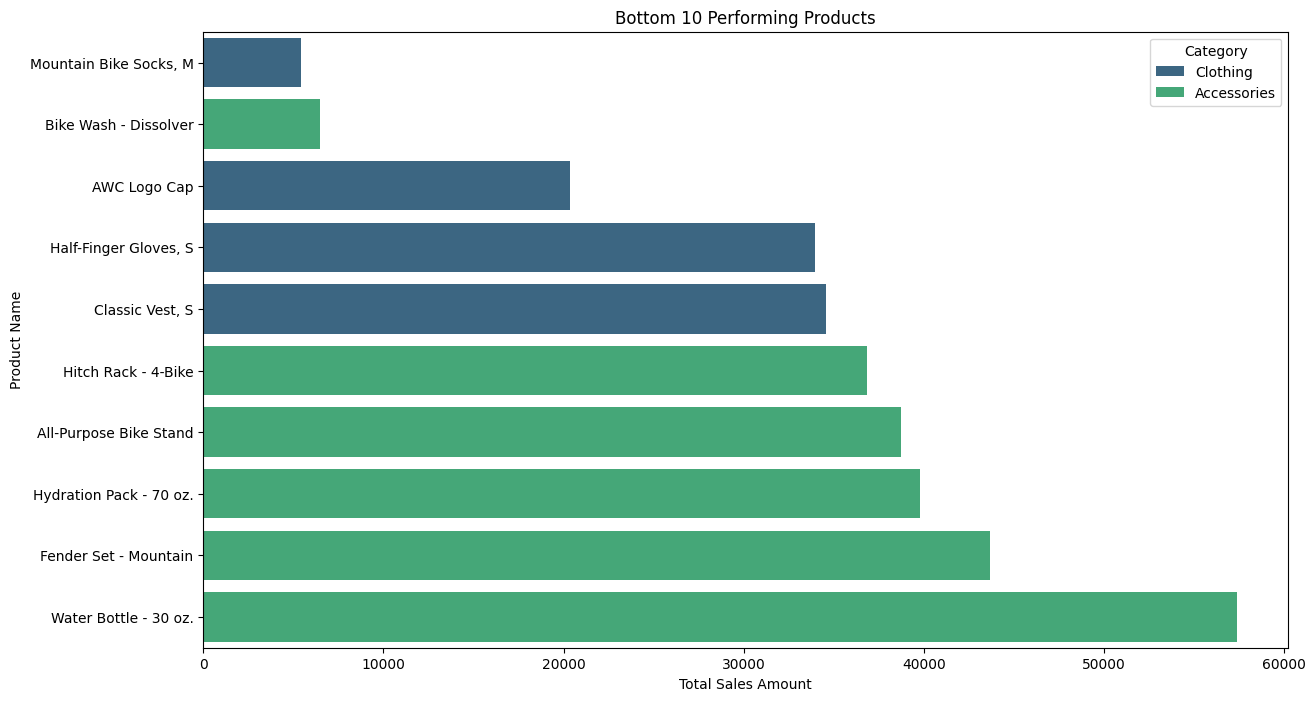

In [75]:
# with columns: 'Category', 'Subcategory', 'ProductName', 'Grand_Total', 'Month', 'SalesAmount'

# Group by ProductName to analyze performance
product_performance = budget_data_long.groupby(['ProductName', 'Category', 'Subcategory'])['SalesAmount'].sum().reset_index()

# Top 10 performing products
top_products = product_performance.nlargest(10, 'SalesAmount')

# Bottom 10 performing products
bottom_products = product_performance.nsmallest(10, 'SalesAmount')

# Plotting the top 10 performing products
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='SalesAmount', y='ProductName', hue='Category', palette='viridis')
plt.title('Top 10 Performing Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.show()

# Plotting the bottom 10 performing products
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_products, x='SalesAmount', y='ProductName', hue='Category', palette='viridis')
plt.title('Bottom 10 Performing Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.show()


### Interpretation:

1. **Top Performing Products**:
   - The top-performing products are dominated by bikes, with "Mountain-100 Silver, 38," "Road-150 Red, 62," and "Touring-2000 Blue, 60" leading in sales.
   - These products have significantly higher sales amounts compared to others, indicating strong customer demand and market acceptance.

2. **Bottom Performing Products**:
   - The bottom-performing products include accessories and clothing items such as "Water Bottle - 30 oz.," "Fender Set - Mountain," and "Hydration Pack - 70 oz."
   - These products have relatively low sales amounts, suggesting they are not as popular or in demand as the top-performing products.

### Solution to the Business Problem:

1. **Marketing and Promotion for Bottom Performers**:
   - **Targeted Marketing**: Develop targeted marketing campaigns for the bottom-performing products to increase awareness and interest. Highlight unique features and benefits of these products in advertisements and promotions.
   - **Promotional Offers**: Offer discounts, bundle deals, or limited-time promotions to incentivize customers to purchase these products. For example, "Buy one, get one free" offers or discount codes.

2. **Product Improvement and Development**:
   - **Customer Feedback**: Collect feedback from customers who purchased bottom-performing products to understand their pain points and reasons for low sales. Use this information to improve the products.
   - **Product Enhancement**: Make necessary enhancements to the design, quality, or functionality of the low-performing products based on customer feedback and market research.

3. **Inventory Management**:
   - **Adjust Inventory Levels**: Based on the sales performance, adjust inventory levels to ensure sufficient stock of top-performing products and avoid overstocking of low-performing items.
   - **Seasonal Analysis**: Analyze the seasonality of product sales to align inventory levels with peak demand periods.

4. **Sales Strategy**:
   - **Focus on Best Sellers**: Prioritize the promotion and availability of top-performing products to maximize sales and revenue.
   - **Expand Product Line**: Introduce new variations or complementary products based on the success of top-performing items to capture additional market share.


In [76]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [77]:
# Assuming budget_data_long is already defined
budget_dataset = budget_data_long

# Save the DataFrame as a CSV file
budget_dataset.to_csv('budget_dataset.csv', index=False)


# ML Model


# Business Problem: Sales Revenue Optimization
## A retail/e-commerce company wants to maximize revenue by optimizing product pricing, managing costs efficiently, and understanding the effect of order quantity on total sales.

In [78]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features
features = [
    "OrderQuantity", "UnitPrice", "TotalProductCost", "TaxAmt", "StandardCost_x"
]
target = "SalesAmount"

# Splitting data into features and target variable
X = adventure_data[features]
y = adventure_data[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Decision Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")

Decision Tree Model Performance:
Mean Absolute Error (MAE): 2.102632930475216
Mean Squared Error (MSE): 19.41917286864556
Root Mean Squared Error (RMSE): 4.406719059418873
R-squared Score: 0.9999782215113485


In [80]:
train_r2 = dt_model.score(X_train, y_train)
test_r2 = dt_model.score(X_test, y_test)

print(f"Training R-squared Score: {train_r2}")
print(f"Testing R-squared Score: {test_r2}")

Training R-squared Score: 0.9999784355279853
Testing R-squared Score: 0.9999782215113485


## Interpretation:
Both values are almost identical, which suggests the model is NOT overfitting. The model generalizes well to unseen data.



In [81]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X_train, y_train, scoring='r2', cv=5)
print("Cross-validation R² scores:", cv_scores)
print("Average Cross-validation R²:", np.mean(cv_scores))

Cross-validation R² scores: [0.99997834 0.99997853 0.99997894 0.9999791  0.9999771 ]
Average Cross-validation R²: 0.9999784013268925


## Interpretation:
The scores are consistent across different validation folds, meaning the model is stable. There are no drastic variations, suggesting no data leakage or randomness affecting the model.

### **Real-Time Applications of This Model**  

#### ** Sales Forecasting **  
🔹 **Use Case:** Predict future sales amounts based on past transaction data.  
🔹 **Benefits:** Helps in demand planning, inventory management, and pricing strategies.  
🔹 **Example:** A retail company predicts next month’s sales based on factors like order quantity, unit price, and product cost. If the model predicts higher sales, they can stock up inventory to avoid shortages.  

#### ** Dynamic Pricing Strategy **  
🔹 **Use Case:** Adjust product prices dynamically by analyzing cost, tax, and sales trends.  
🔹 **Benefits:** Maximizes revenue by optimizing pricing strategies.  
🔹 **Example:** An e-commerce store predicts how much customers are willing to pay for a product. If sales are low and profit margins are high, they may offer discounts to boost sales.  

#### ** Revenue and Profit Prediction **  
🔹 **Use Case:** Estimate future revenue and profits by considering product cost and sales.  
🔹 **Benefits:** Helps in financial planning and investment decisions.  
🔹 **Example:** A restaurant chain predicts monthly revenue based on dish pricing and order frequency.  

#### ** Supply Chain Optimization **  
🔹 **Use Case:** Predicting sales helps businesses optimize logistics, warehousing, and procurement.  
🔹 **Benefits:** Reduces wastage, improves efficiency, and ensures timely raw material procurement.  
🔹 **Example:** A manufacturer predicts demand for electronic gadgets, ensuring timely raw material procurement.  

#### ** Tax & Compliance Planning **  
🔹 **Use Case:** Estimate tax liabilities based on total sales and tax amounts.  
🔹 **Benefits:** Helps businesses stay compliant with financial regulations.  
🔹 **Example:** A retail company predicts tax to be paid at the end of the quarter based on sales figures.  